# Project: The Movie Database Investigation Report

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is submitted in fullfilment of Udacity's DAND.
In this project we investigate The Movie Database (TMDB) provided in the Udacity's reference to sample datasets that would help us make our first project for the nanodegree.

In [85]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(8,8)})

#### Helper Functions

In [86]:
def revenue_extract(df, variable, parameters, metric):

    data_out = {variable:[], metric:[]}
    for parameter in parameters:
        metric_counter = 0        
        for record in range(df.shape[0]):
            variable_list = df[str(variable)][record].split('|')
            if parameter in variable_list:
                metric_counter += df[metric][record]
        
        data_out[variable].append(parameter)
        data_out[metric].append(metric_counter)
    return pd.DataFrame(data_out, columns=[variable, metric])

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [87]:
# Loading Dataset
dataset = pd.read_csv('tmdb-movies.csv')

In [88]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [89]:
dataset.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Now that we know more info about our columns in our dataset, we can have better insights into how will we clean our dataset in order to be able to answer the questions of our investigation.

At first, it's necessary to fill out any missing fields (wherever possible) and drop out any columns that are of no much use to us as per our investigation.

### Data Cleaning (Replace this with more specific notes!)

At first, dropping the unnecessary columns would make cleaning the dataset much easier for us.
The columns that I'd drop are:
- 'homepage'
- 'tagline'
- 'overview'
- 'imdb_id'


In [90]:
dataset.drop(['homepage', 'tagline', 'overview', 'imdb_id'], axis=1, inplace=True)
print('Columns dropped')

Columns dropped


#### Handling Missing Data

At first, we need to indetify the columns that have missing data from our dataset.

In [91]:
missing_columns = dataset.columns[dataset.isnull().any()].tolist()
missing_columns

['cast', 'director', 'keywords', 'genres', 'production_companies']

Now that we have the missing columns, we can notice that its hard to fill any of these columns with the mean value. It doesn't make sense to add cast, genres, directors or production companies of movies based on the mean. In that sense, its better to discard the records where these tables have null or missing values.

In [92]:
dataset.dropna(inplace=True)

#### Handling Duplicates
We need at first to identify if there are any duplicates in our dataset.

In [93]:
sum(dataset.duplicated())

1

As per our check, we only have one duplicate. We need to remove that duplicate and verify that our action did the deed.

In [94]:
dataset.drop_duplicates(inplace=True)

In [95]:
sum(dataset.duplicated())

0

Now we need to reset our index since dropping rows can mess up and skip numbers in our index.

In [96]:
dataset.reset_index(drop=True, inplace=True)

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8666 non-null   int64  
 1   popularity            8666 non-null   float64
 2   budget                8666 non-null   int64  
 3   revenue               8666 non-null   int64  
 4   original_title        8666 non-null   object 
 5   cast                  8666 non-null   object 
 6   director              8666 non-null   object 
 7   keywords              8666 non-null   object 
 8   runtime               8666 non-null   int64  
 9   genres                8666 non-null   object 
 10  production_companies  8666 non-null   object 
 11  release_date          8666 non-null   object 
 12  vote_count            8666 non-null   int64  
 13  vote_average          8666 non-null   float64
 14  release_year          8666 non-null   int64  
 15  budget_adj           

In [98]:
dataset.iloc[:,1:].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,0.741937,1.770937e+07,4.924863e+07,103.815140,264.204823,6.003612,2000.129818,2.130749e+07,6.362440e+07
std,1.087657,3.357362e+07,1.289529e+08,26.207186,635.195808,0.893539,13.221278,3.710269e+07,1.592874e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.249990,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,0.449377,1.500000e+06,1.793820e+05,100.000000,54.000000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,0.842984,2.100000e+07,3.890269e+07,113.000000,200.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


Now that we have cleaned our data and verified we have the necessary columns to aid with our investigation, we can proceed to the EDA.

<a id='eda'></a>
## Exploratory Data Analysis

In these section, I address some of the questions that I thought would provide some good insights into our dataset.

### Do movies with more budgets generate bigger revenue?

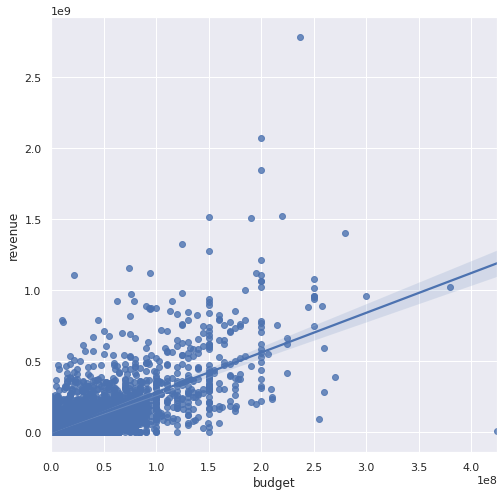

In [99]:
# dataset.plot.scatter(x='budget', y='revenue', figsize=(8,8));
sns.regplot(x=dataset['budget'], y=dataset['revenue']);

As we can see, there is a slightly positive coorelation between the budget size of the movie and the revenue it could generate. Of course there are some exceptions to the case as shown by the scatter plot.

### How does a movie genre affect a movie's revenue?

Given the structure of genres in our dataset and the fact that a movie could have multiple genres, we need to have a reference of all available genres in our dataset.

In [100]:
movie_genres = dataset['genres'].str.split('|', expand=True).stack().unique()
movie_genres.tolist()

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

We will now use the helper funtion declared in the beginning of the report in order to retreive the revenues per genres

In [101]:
revenue_per_genre = revenue_extract(dataset, 'genres', movie_genres, 'revenue')

In [102]:
revenue_per_genre.sort_values(by='revenue', ascending=False, inplace=True)

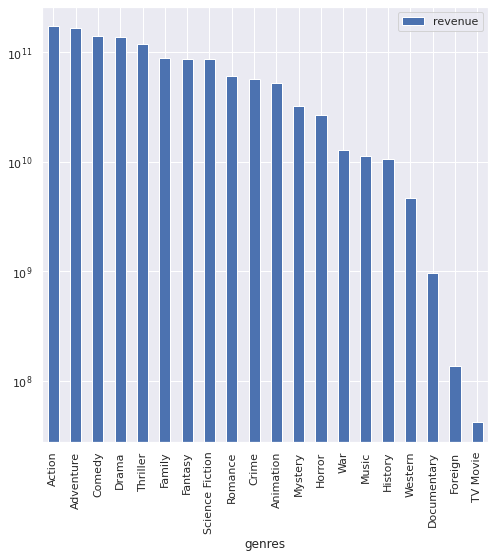

In [103]:
revenue_per_genre.plot(x='genres', y='revenue', kind='bar', figsize=(8,8),logy=True);

We can observe here that Action movies make most revenue while TV Movie makes the least. Plot had a log to the y-axis to better visualize the figures of movies with significantly lower revenues.

### Top 10 Popular movies

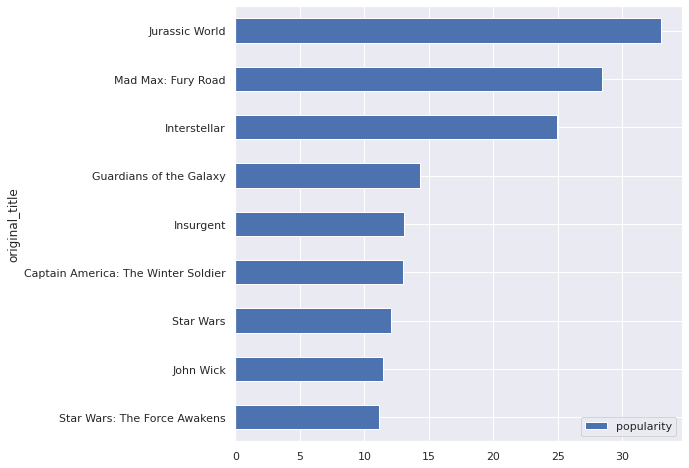

In [104]:
popular_movies = dataset.sort_values(by='popularity', ascending=False, ignore_index=True)
top_10 = popular_movies.iloc[0:9][::-1]
top_10.plot(x='original_title', y='popularity', kind='barh', figsize=(8,8));

### Top 10 Directors

In [105]:
director_movie_count = pd.Series(dataset['director'].str.cat(sep='|').split('|')).value_counts()

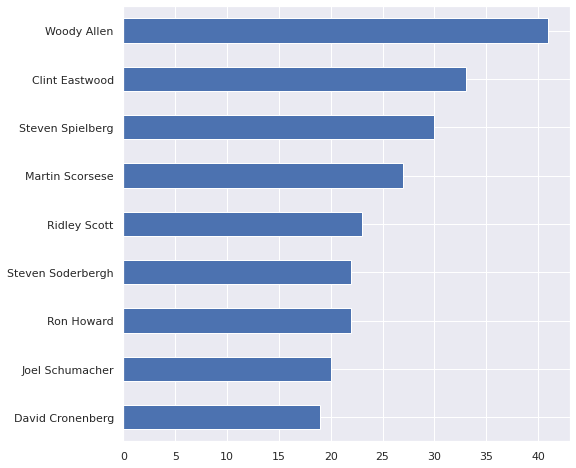

In [106]:
director_movie_count[0:9][::-1].plot(kind='barh', figsize=(8,8));

### Genre Popularity Yearly

At first, we need to identify the range of years our movie dataset runs from.

In [107]:
print("Release years range:", str(dataset['release_year'].unique().min()) + "-"+ str(dataset['release_year'].unique().max()))

Release years range: 1960-2015


We will then take into account, only the top 10 genres by revenue that was calculated above to measure their popularity over the years.

In [108]:
top_10_genres = revenue_per_genre['genres'][:10].tolist()
print(top_10_genres)

['Action', 'Adventure', 'Comedy', 'Drama', 'Thriller', 'Family', 'Fantasy', 'Science Fiction', 'Romance', 'Crime']


In [109]:
genre_popularity = pd.DataFrame(index=top_10_genres, columns=range(1960,2016)).fillna(value=0.0)

In [110]:
for index, row in genre_popularity.iterrows():
    genre_df = dataset[dataset['genres'].str.contains(index)]
    std_genre = genre_df.groupby('release_year')['popularity'].std()
    for index, value in std_genre.iteritems():
        row[index] = value

In [111]:
genre_popularity.fillna(genre_popularity.mean(), inplace=True)

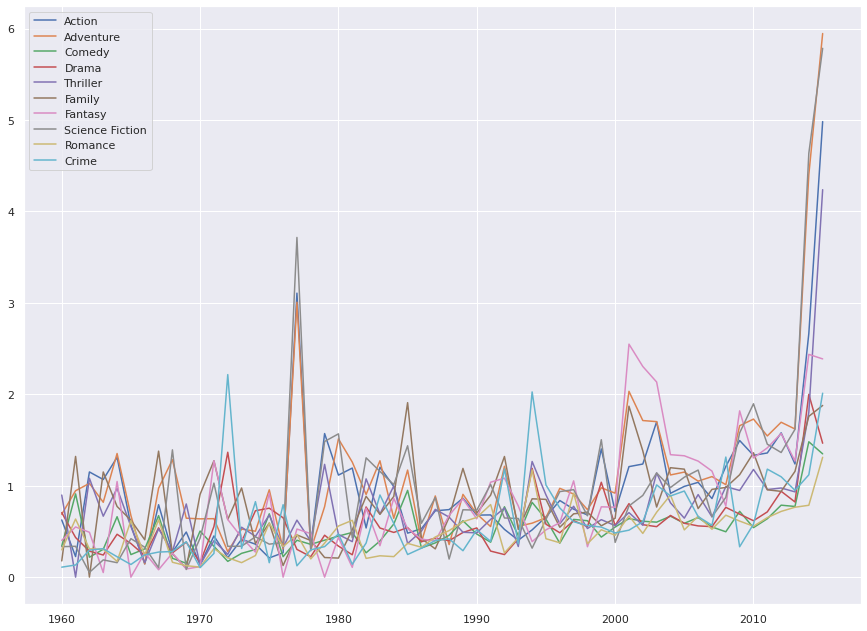

In [112]:
genre_popularity_transposed = genre_popularity.transpose()
genre_popularity_transposed.plot(kind='line', figsize=(15,11));

As we can see, the multi-dimensional plot of genre popularity every year is a bit messy to look at. It's better to break it down to minor subplots.

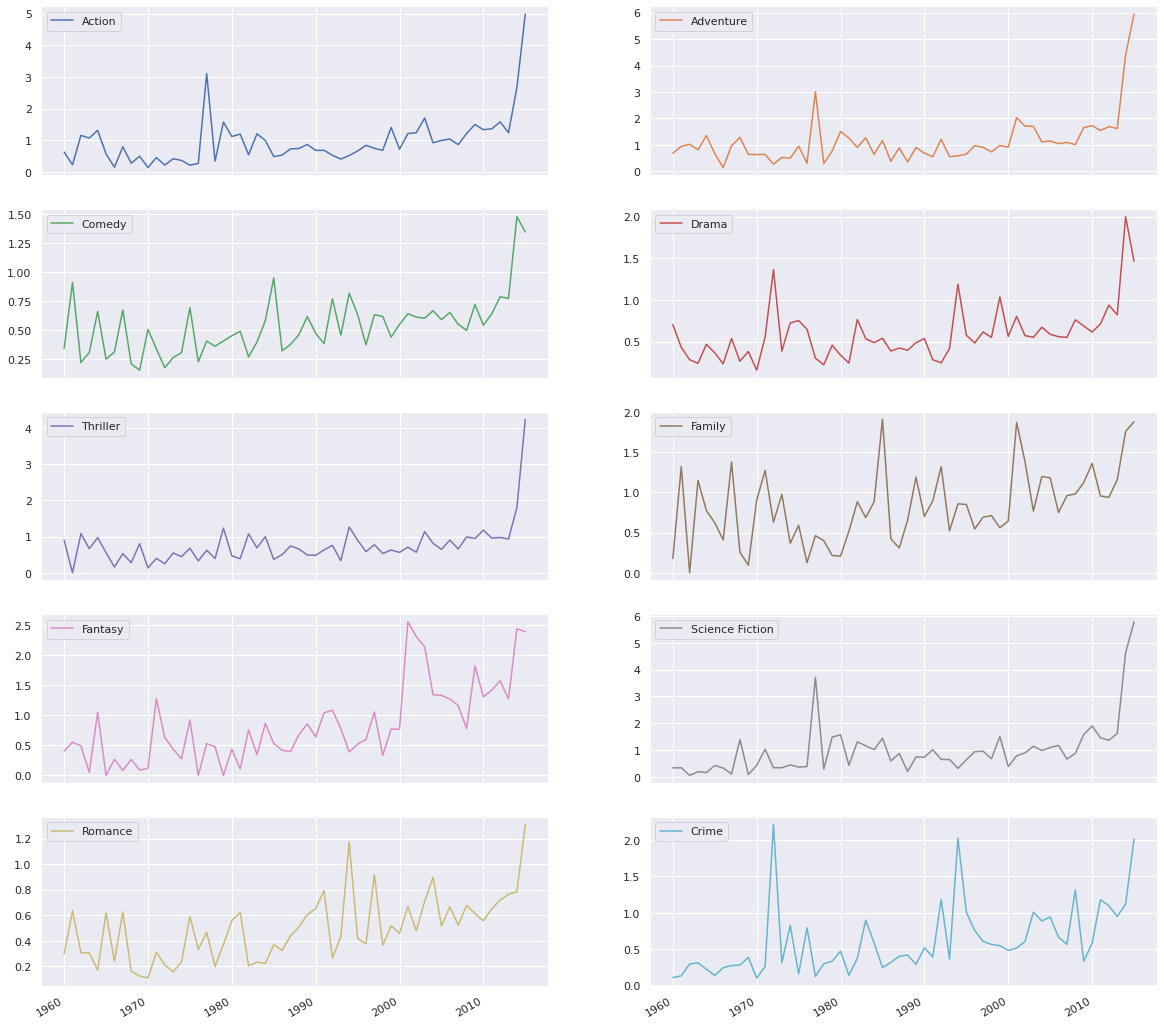

In [113]:
genre_popularity_transposed.plot(kind='line', subplots=True, figsize=(20,20), layout=(5,2));

### Top 20 most active actors/actresses

In [114]:
actors = pd.Series(dataset['cast'].str.cat(sep='|').split('|')).value_counts()

In [115]:
actors_df = actors.to_frame(name="movies");

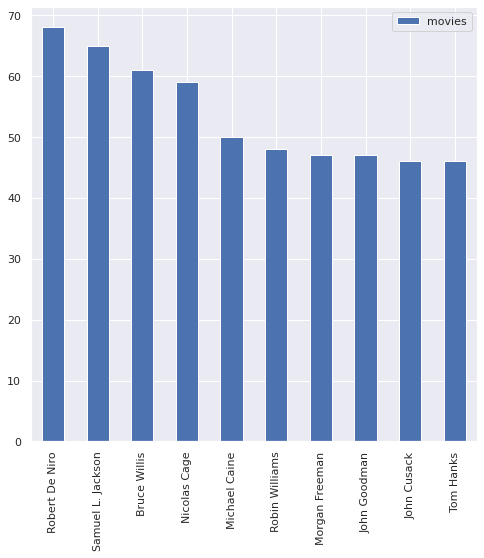

In [116]:
actors_df[0:10].plot(kind='bar', figsize=(8,8))

### Active Production Companies Revenue Yearly

In [117]:
most_active_companies = pd.Series(dataset['production_companies'].str.cat(sep='|').split('|')).value_counts()
most_active_companies

Warner Bros.                              495
Universal Pictures                        490
Paramount Pictures                        419
Twentieth Century Fox Film Corporation    275
Columbia Pictures                         268
                                         ... 
Land Associates                             1
Patricia Clifford Productions               1
Midsummer Films                             1
Extinct Production                          1
Iconolatry Productions Inc.                 1
Length: 7055, dtype: int64

In [118]:
company_revenue = pd.DataFrame(index=most_active_companies.index[:10], columns=range(1960,2016)).fillna(value=0.0)

In [119]:
for index, row in company_revenue.iterrows():
    company_df = dataset[dataset['production_companies'].str.contains(index)]
    reveue_sum = company_df.groupby('release_year')['revenue'].sum()
    for index, value in reveue_sum.iteritems():
        row[index] = value

/home/omar/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


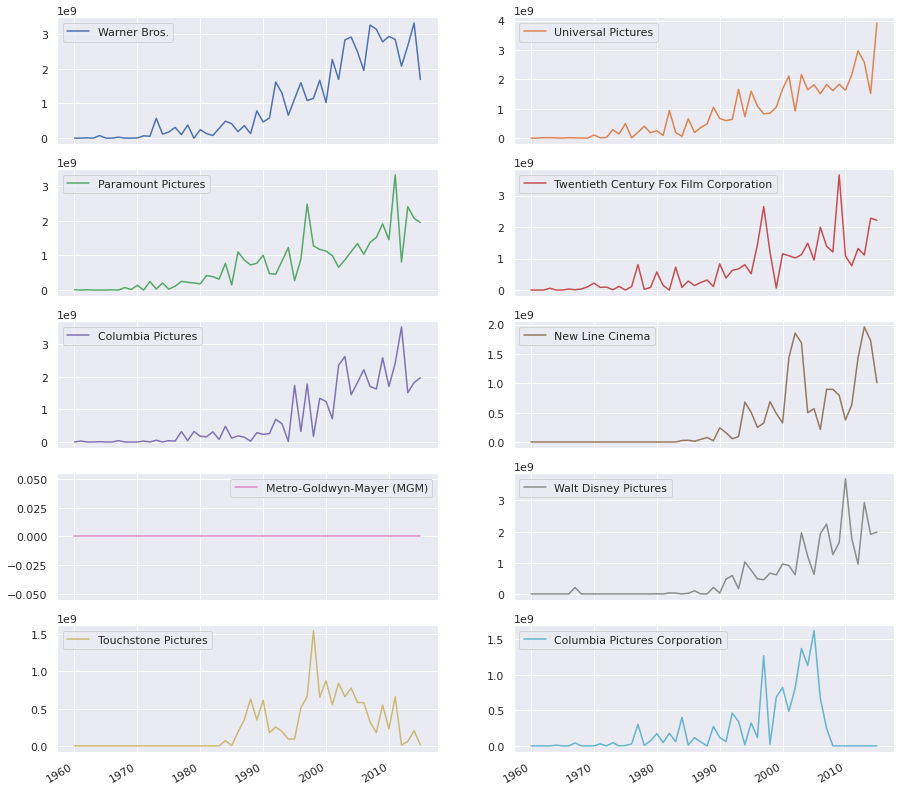

In [120]:
company_rev_transposed = company_revenue.transpose()
company_rev_transposed.plot(kind='line', figsize=(15,15), subplots=True, layout=(5,2));

<a id='conclusions'></a>
## Conclusions

- Generally speaking, the more the budget of a movie, the more the revenue it will retain.
- Action movies generate the most revenue amongst all genres.
- Woody Allen has directed most films in our dataset which starts from 1960-2015.
- Even though adventure movies come second as far as revenue is concerned, but they are more popular that action movies.
- Robert De Niro is the most active actor between 1960-2015
- Universal Pictures and Warner Bros. have been in the lead for profitability, with the former making a significant increase in revenue after 2010 while the latter observed a decline in revenue.